# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:24:44.479137+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

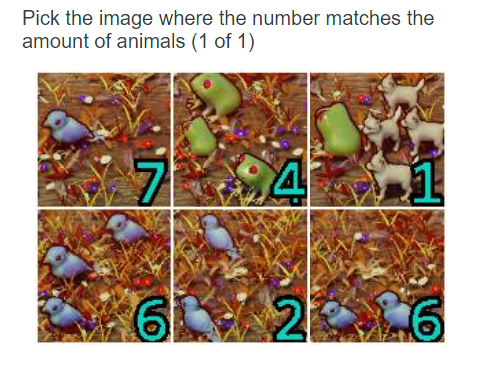

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A prompt instructs the user to pick the image where the number matches the amount of animals, with no images shown in this frame.")
    describe(1, "A grid of six images, each containing animals and a number overlaid, representing the count of animals in the image.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 1 provides the options to solve the task described in Frame 0.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click on the image in Frame 1 where the number matches the count of animals present in the image.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    # Frame 0 is the instruction frame and is not interactable
    # Frame 1 contains the grid of images
    frame_1 = frames[1]
    
    # Split Frame 1 into a grid of selectable subframes
    subframes = frame_1.split(rows=2, columns=3)
    
    # Mark each subframe as SELECTABLE
    for subframe in subframes:
        subframe.set_frame_as(interactable="SELECTABLE")

## Solution Composition

In [ ]:
def stage3(frames):
    # Mark animals in each frame
    marked_images = mark([frame.image for frame in frames[1:]], "animal")
    
    # Count the number of animals in each marked image
    animal_counts = ask(marked_images, "What is the number of animals in the marked red boxes?", answer_type="int")
    
    # Extract the number shown in each image
    numbers_in_images = ask([frame.image for frame in frames[1:]], "What is the number in the image?", answer_type="int")
    
    # Find the frame where the number is closest to the count of animals
    differences = [abs(animal_count - number) for animal_count, number in zip(animal_counts, numbers_in_images)]
    best_match_index = differences.index(min(differences))
    
    # Select the frame with the closest match
    select(frames[best_match_index + 1])

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: What is the number of animals in the marked red boxes?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.
## Guidelines
1. Focus on red boxes that are related, based on their shape, texture, and context, avoiding double-counting overlapping boxes.
2. Red boxes are not perfect, it may wrongly mark or miss objects (e.g., rocks and grass).
3. You should use the red boxes as a reference rather than ground truth.
'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5
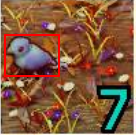
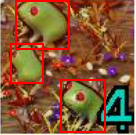
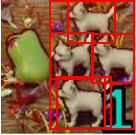
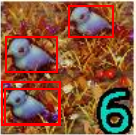
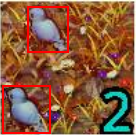
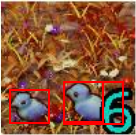

In [ ]:
IMAGES = 6

In [ ]:
RESPONSE = '''
answer(numbers=[1, 3, 4, 3, 2, 2])
'''
TIME = 2.7332845679484308
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1660
PROMPT_TOKENS = 1639
COMPLETION_TOKENS = 21

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: What is the number in the image?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.

'''

Image 0 Image 1 Image 2 Image 3 Image 4 Image 5
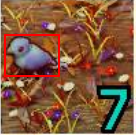
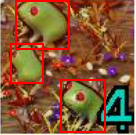
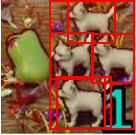
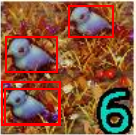
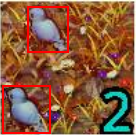
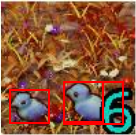

In [ ]:
IMAGES = 6

In [ ]:
RESPONSE = '''
answer(numbers=[7, 4, 1, 6, 2, 6])
'''
TIME = 7.355156511068344
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 1588
PROMPT_TOKENS = 1567
COMPLETION_TOKENS = 21

---